In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import mplfinance as mpf
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from datetime import datetime as dt
from typing import \
    List, \
    Dict, \
    Callable


In [25]:
system_201_dir = '/Users/mbz/Documents/environments_local/system201'
features_dir = 'var/osprey_indicators'
asset_class_name = 'Energies'
symbol = 'CL'
data_file_dir = '{}/{}/{}/{}'.format(system_201_dir, features_dir, asset_class_name, symbol)
file_name_pattern_list = [
    '{}.base.core.gp_train_set.csv',
    '{}.base.technical.gp_train_set.csv',
    '{}.base.returns.gp_train_set.csv',
    '{}.base.carry.gp_train_set.csv',
    '{}.base.seasonality.gp_train_set.csv',
    '{}.base.vol.gp_train_set.csv',
    '{}.base.price.gp_train_set.csv',
]
# core_df = pd.read_csv('{}/CL.base.core.gp_train_set.csv'.format(data_file_dir))

df_list = []
for file_name_pattern in file_name_pattern_list:
    file_name = file_name_pattern.format(symbol)
    df = pd.read_csv(data_file_dir + '/' + file_name,
                     index_col=0,
                     header=0,
                     parse_dates=[0],
                     date_format="%Y-%m-%d")
    df.columns = [col.strip() for col in df.columns]
    df_clean = df
    # df_clean.columns = [name+'.'+col_name for col_name in df_clean.columns]
    df_list.append(df_clean)

# assemble df's from all files into a single df
final_df = pd.concat(df_list, axis=1, join='inner')
final_df = final_df.loc[:,~final_df.columns.duplicated()].copy()



In [26]:
final_df.columns

Index(['OPEN', 'HIGH', 'LOW', 'CLOSE', 'SEC_EC', 'BAR_RAW_PNL', 'BAR_PNL',
       'BAR_RAW_OPEN_PNL', 'BAR_OPEN_PNL', 'NEXT_BAR_RAW_PNL',
       ...
       'CLOSE.MAX_256', 'CLOSE.MEDIAN_1', 'CLOSE.MEDIAN_2', 'CLOSE.MEDIAN_4',
       'CLOSE.MEDIAN_8', 'CLOSE.MEDIAN_16', 'CLOSE.MEDIAN_32',
       'CLOSE.MEDIAN_64', 'CLOSE.MEDIAN_128', 'CLOSE.MEDIAN_256'],
      dtype='object', length=227)

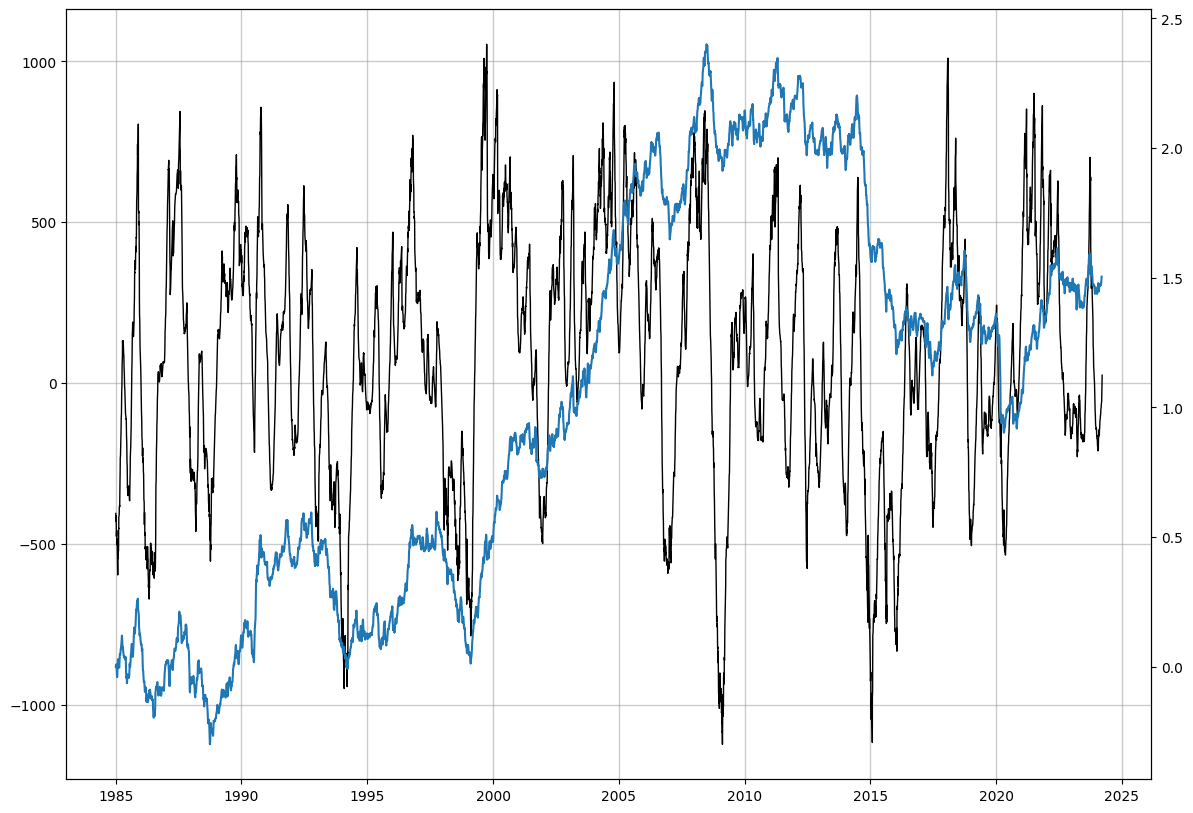

In [29]:
# x_axis_col_name = 'CLOSE.EMAC_PN_16_64'
# x_axis_col_name = 'CLOSE.PNL.EMA_32'
# x_axis_col_name = 'CLOSE.PNL_N.EMA_32'
# x_axis_col_name = 'CLOSE.PNL_N.EMA_64'
# x_axis_col_name = 'CLOSE.PNL_N.EMA_128'
# x_axis_col_name = 'CLOSE.PNL.EMA_128'
x_axis_col_name = 'CLOSE.EMAC_PN_32_128'
# x_axis_col_name = 'days_of_year'
# x_axis_col_name = 'CARRY.EMA_4.SR.ZSCORE_32'

y_axis_col_name = 'NEXT_5_BAR_AVG_OPEN_PNL'
# y_axis_col_name = 'NEXT_20_BAR_AVG_PNL'
# y_axis_col_name = 'NEXT_BAR_OPEN_PNL'
# y_axis_col_name = 'NEXT_BAR_RAW_PNL'



fig, ax1 = plt.subplots(figsize=(14, 10))
# plt.title( '{}: Stage Two Model SR: {:4.3f}'.format(symbol, stage_2_sr), fontsize=15)

ax1.plot(final_df[x_axis_col_name]['1985':], color='black', linewidth='1')
# ax1.plot(final_df['BAR_VOL']['1985':], color='black', linewidth='1')

ax2 = ax1.twinx()
ax2.plot(final_df[y_axis_col_name]['1985':].cumsum())
# ax2.plot(final_df['CLOSE.EMA_32']['1985':])
# ax2.plot(final_df['CLOSE.EMA_128']['1985':])

ax1.grid(which='major', axis='both', linewidth='1', color='#999999', alpha=0.5)
# plt.ylabel("log equity")
# plt.legend()
plt.show()
# fig.savefig('{0}/{1}/{2}/{3}/{3}.stage_two.{4}.equity.png'
#             .format(osprey_experiment_dir, experiment_name, asset_class, symbol, name_str))
# plt.close(fig)


# plt.scatter(final_df[x_axis_col_name], final_df[y_axis_col_name], alpha=0.01)
# # plt.title('Year 2000')
# plt.xlabel(x_axis_col_name)
# plt.ylabel(y_axis_col_name)
# plt.show()


<Axes: xlabel='Count', ylabel='NEXT_5_BAR_AVG_OPEN_PNL'>

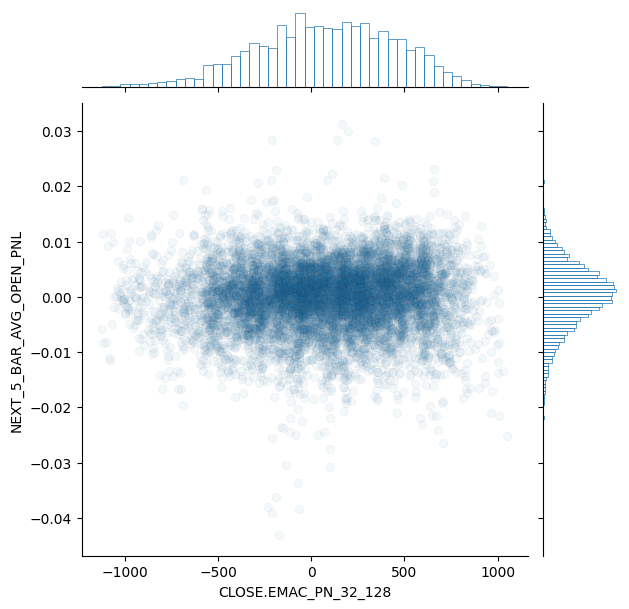

In [7]:

x, y = final_df[x_axis_col_name], final_df[y_axis_col_name]
g = sns.JointGrid()
sns.scatterplot(x=x, y=y, alpha=.05, edgecolor=".2", linewidth=0.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=0.5, ax=g.ax_marg_x)
sns.histplot(y=y, fill=False, linewidth=0.5, ax=g.ax_marg_y)
# sns.lineplot(data=final_df, x=x_axis_col_name, y=x_axis_col_name, ax=g.ax_joint)


In [8]:
# print('{} mean: {} std: {}'.format(x_axis_col_name, 
#                                    final_df[x_axis_col_name].mean(), 
#                                    final_df[x_axis_col_name].std()))

# print('{} mean: {} std: {}'.format(y_axis_col_name, 
#                                    final_df[y_axis_col_name].mean(), 
#                                    final_df[y_axis_col_name].std()))

print(len(final_df))

10033


In [9]:
final_df.sort_values(by=[x_axis_col_name], inplace=True)
final_df['p_'+x_axis_col_name] = np.arange(len(final_df)) / (len(final_df) - 1)

final_df.sort_values(by=[y_axis_col_name], inplace=True)
final_df['p_'+y_axis_col_name] = np.arange(len(final_df)) / (len(final_df) - 1)



x, y = final_df['p_'+x_axis_col_name], final_df['p_'+y_axis_col_name]
# plt.scatter(x, y, alpha=0.01)
# plt.xlabel(x_axis_col_name)
# plt.ylabel(y_axis_col_name)
# plt.show()

# g = sns.JointGrid()
# sns.scatterplot(x=x, y=y, alpha=.1, edgecolor=".2", linewidth=0.5, ax=g.ax_joint)
# sns.histplot(x=x, fill=False, linewidth=0.5, ax=g.ax_marg_x)
# sns.histplot(y=y, fill=False, linewidth=0.5, ax=g.ax_marg_y)
# sns.lineplot(data=final_df, x='p_'+x_axis_col_name, y='p_'+x_axis_col_name, ax=g.ax_joint)


In [39]:
bin_count = 10
bin_col_name_list = []

final_df.sort_index(inplace=True)

# bin x feature
x_bin_assignments, x_bin_edges = pd.qcut(final_df[x_axis_col_name],
                                          q=bin_count,
                                          retbins=True,
                                          labels=False,
                                          duplicates='drop')
x_bin_assignments_df = x_bin_assignments.to_frame()
x_bin_col_name = 'bins_' + x_axis_col_name
bin_col_name_list.append(x_bin_col_name)
x_bin_assignments_df.rename(columns={x_axis_col_name: x_bin_col_name}, inplace=True)

# bin y target
y_bin_assignments, y_bin_edges = pd.qcut(final_df[y_axis_col_name],
                                          q=bin_count,
                                          retbins=True,
                                          labels=False,
                                          duplicates='drop')
y_bin_assignments_df = y_bin_assignments.to_frame()
y_bin_col_name = 'bins_' + y_axis_col_name
bin_col_name_list.append(y_bin_col_name)
y_bin_assignments_df.rename(columns={y_axis_col_name: y_bin_col_name}, inplace=True)


# create data_frame with bins and target feature
binned_data_df = pd.concat([x_bin_assignments_df, y_bin_assignments_df], axis=1)
binned_data_df = binned_data_df.join(
    final_df[y_axis_col_name],
    how='right'
)
binned_data_df.dropna(axis=0, inplace=True)

# calculate the joint distribution
y_hats = binned_data_df.groupby(bin_col_name_list)[y_axis_col_name].count()
temp_y_hat_df = y_hats.to_frame()
temp_y_hat_df.columns = ['y_hat']
# y_hat_df = y_hat_df.reset_index()

y_hat_df = pd.DataFrame(index=create_y_hat_index(bin_col_name_list, bin_count))
y_hat_df['y_hat'] = temp_y_hat_df['y_hat']
y_hat_df = y_hat_df.reset_index()

<Axes: xlabel='p_CLOSE.EMAC_PN_32_128', ylabel='p_NEXT_5_BAR_AVG_OPEN_PNL'>

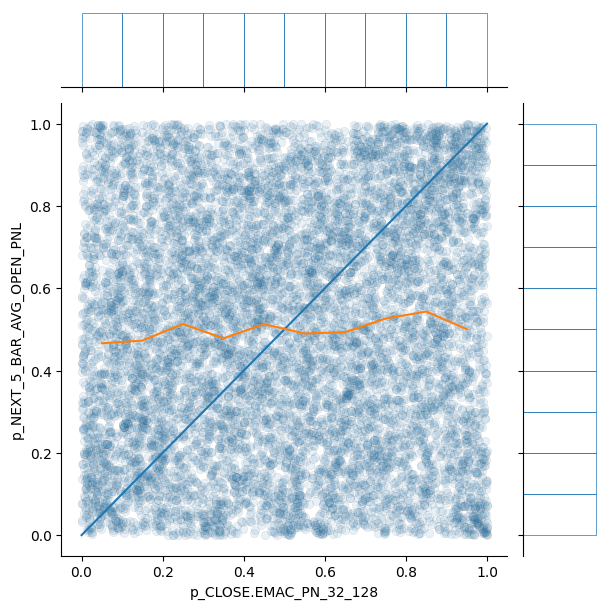

In [40]:
final_df[x_bin_col_name] = binned_data_df[x_bin_col_name]

# calculate the y_hat for each bin
y_hats = final_df.groupby(x_bin_col_name)['p_'+y_axis_col_name].mean()

g = sns.JointGrid()
sns.scatterplot(x=x, y=y, alpha=.1, edgecolor=".2", linewidth=0.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=0.5, ax=g.ax_marg_x, bins=10)
sns.histplot(y=y, fill=False, linewidth=0.5, ax=g.ax_marg_y, bins=10)
sns.lineplot(data=final_df, x='p_'+x_axis_col_name, y='p_'+x_axis_col_name, ax=g.ax_joint)
sns.lineplot(x=np.arange(0.05, 1.05, 0.1), y=y_hats, ax=g.ax_joint)


In [41]:
# x, y = final_df['p_'+x_axis_col_name], final_df['p_'+y_axis_col_name]

# sns.histplot(
#     data=final_df, x='p_'+x_axis_col_name, y='p_'+y_axis_col_name, 
#     bins=10, cbar=True, stat='percent'
# )


In [42]:
y_hat_pivot_df = y_hat_df.pivot(index=bin_col_name_list[1], columns=bin_col_name_list[0], values='y_hat')
y_hat_pivot_df = y_hat_pivot_df.iloc[::-1]
print(y_hat_pivot_df)


bins_CLOSE.EMAC_PN_32_128       0    1    2    3    4    5    6    7    8    9
bins_NEXT_5_BAR_AVG_OPEN_PNL                                                  
9                              97   91  105   70   73   88   86  130  120  143
8                              79   89   91   90  126   97   84  104  131  112
7                              81   76  107   93   99  100  128  105  124   89
6                              93   92  111  101  126  112   94  107   87   80
5                             102  104  106  127  114   96   89   89   91   84
4                              95  101  113  106   96  109  115   96  105   67
3                             104  107  104  111  100   96  111   90  100   80
2                             107  129   85  108   92   97  104  101   81   98
1                             127  130   89   83   89   92  104   99   87  103
0                             119   84   92  111   86  116   88   82   77  148


In [43]:
# glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
# sns.heatmap(y_hat_pivot_df)


In [44]:
# y_hat_df


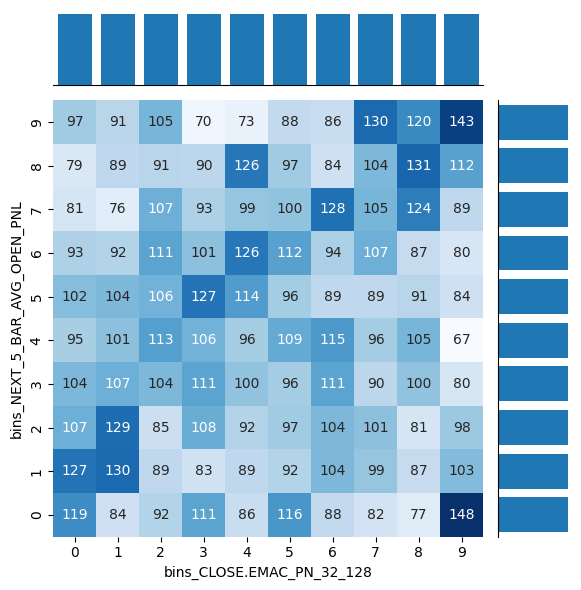

In [45]:
g = sns.jointplot(data=y_hat_df, 
                  x=bin_col_name_list[0], 
                  y=bin_col_name_list[1], 
                  kind='hist', 
                  bins=(len(bin_col_name_list[0]), len(bin_col_name_list[1])))
g.ax_marg_y.cla()
g.ax_marg_x.cla()
sns.heatmap(data=y_hat_pivot_df, ax=g.ax_joint, cbar=False, cmap='Blues', annot=True, fmt="d")
g.ax_marg_y.barh(np.arange(0.5, 10), y_hat_pivot_df.sum(axis=1)/len(bin_col_name_list[0]))
g.ax_marg_x.bar(np.arange(0.5, 10), y_hat_pivot_df.sum(axis=0)/len(bin_col_name_list[1]))

# remove ticks between heatmao and histograms
g.ax_marg_x.tick_params(axis='x', bottom=False, labelbottom=False)
g.ax_marg_y.tick_params(axis='y', left=False, labelleft=False)
# remove ticks showing the heights of the histograms
g.ax_marg_x.tick_params(axis='y', left=False, labelleft=False)
g.ax_marg_y.tick_params(axis='x', bottom=False, labelbottom=False)

plt.show()

In [46]:
# sns.displot(y_hat_df, x="bins_CLOSE.PNL_N.EMA_32", y="bins_NEXT_20_BAR_AVG_PNL", binwidth=(2, .5), cbar=True)


In [47]:
final_df.columns[0:20]

Index(['OPEN', 'HIGH', 'LOW', 'CLOSE', 'SEC_EC', 'BAR_RAW_PNL', 'BAR_PNL',
       'BAR_RAW_OPEN_PNL', 'BAR_OPEN_PNL', 'NEXT_BAR_RAW_PNL', 'NEXT_BAR_PNL',
       'NEXT_BAR_RAW_OPEN_PNL', 'NEXT_BAR_OPEN_PNL',
       'NEXT_BAR_OPEN_PNL_VOL_BIASED', 'NEXT_5_BAR_AVG_PNL',
       'NEXT_5_BAR_AVG_OPEN_PNL', 'NEXT_5_BAR_AVG_OPEN_PNL_VOL_BIASED',
       'NEXT_10_BAR_AVG_PNL', 'NEXT_20_BAR_AVG_PNL', 'POS_SZ'],
      dtype='object')

In [48]:
# calculate the joint distribution
y_hats = binned_data_df.groupby(x_bin_col_name)[y_axis_col_name].mean()
temp_y_hat_df = y_hats.to_frame()
temp_y_hat_df.columns = ['y_hat']
# y_hat_df = y_hat_df.reset_index()

# y_hat_df = pd.DataFrame(index=create_y_hat_index(bin_col_name_list, bin_count))
y_hat_df = temp_y_hat_df
y_hat_df['y_hat'] = temp_y_hat_df['y_hat']
y_hat_df = y_hat_df.reset_index()

In [49]:
print(y_hat_df)


   bins_CLOSE.EMAC_PN_32_128     y_hat
0                          0 -0.000353
1                          1 -0.000203
2                          2  0.000291
3                          3 -0.000424
4                          4  0.000334
5                          5 -0.000192
6                          6  0.000075
7                          7  0.000755
8                          8  0.000944
9                          9 -0.000060


<Axes: xlabel='bins_CLOSE.EMAC_PN_32_128', ylabel='y_hat'>

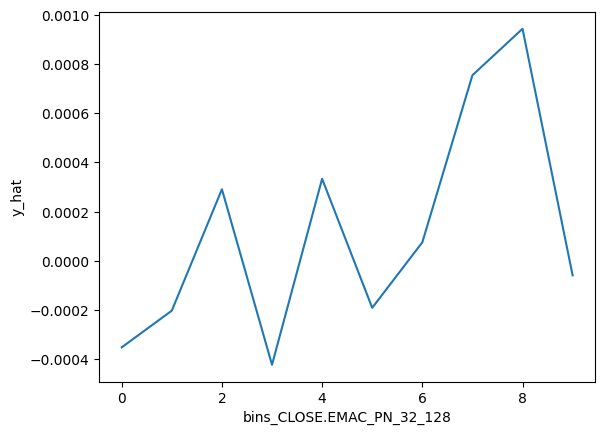

In [50]:
sns.lineplot(data=y_hat_df, x=x_bin_col_name, y='y_hat')

In [51]:
# print(binned_data_df)

bin_backtest_df = final_df[['CLOSE', 'NEXT_BAR_OPEN_PNL', x_axis_col_name]].copy()
bin_backtest_df.index = final_df.index
# print(bin_backtest_df)


In [52]:
bin_assignments = pd.cut(bin_backtest_df[x_axis_col_name],
                         bins=x_bin_edges,
                         labels=False,
                         include_lowest=True)
bin_backtest_df[x_bin_col_name] = bin_assignments
# print(bin_backtest_df)
# print(y_hat_df)

bin_backtest_df = bin_backtest_df.merge(y_hat_df, left_on=x_bin_col_name, right_on=x_bin_col_name)
bin_backtest_df.index = final_df.index


In [53]:
# print(bin_backtest_df)



In [54]:
bin_backtest_df['bin_model_returns'] = bin_backtest_df['NEXT_BAR_OPEN_PNL'] * bin_backtest_df['y_hat']
bin_model_ann_vol = 16 * bin_backtest_df['bin_model_returns'].std()
bin_model_vol_mult = 0.2 / bin_model_ann_vol
bin_backtest_df['bin_model_returns'] = bin_model_vol_mult * bin_backtest_df['bin_model_returns']
bin_model_sr = 252 * bin_backtest_df['bin_model_returns'].mean() / 0.2

bin_backtest_df['linear_model_returns'] = bin_backtest_df['NEXT_BAR_OPEN_PNL'] * bin_backtest_df[x_axis_col_name]
lin_model_ann_vol = 16 * bin_backtest_df['linear_model_returns'].std()
lin_model_vol_mult = 0.2 / lin_model_ann_vol
bin_backtest_df['linear_model_returns'] = lin_model_vol_mult * bin_backtest_df['linear_model_returns']
lin_model_sr = 252 * bin_backtest_df['linear_model_returns'].mean() / 0.2

def binary_classifier(row):
    if row[x_axis_col_name] > 0:
        val = 1
    elif row[x_axis_col_name] < 0:
        val = -1
    else:
        val = 0
    return val
class_col_name = '{}_class'.format(x_axis_col_name)
bin_backtest_df[class_col_name] = bin_backtest_df.apply(binary_classifier, axis=1)
bin_backtest_df['class_model_returns'] = bin_backtest_df['NEXT_BAR_OPEN_PNL'] * bin_backtest_df[class_col_name]
class_model_ann_vol = 16 * bin_backtest_df['class_model_returns'].std()
class_model_vol_mult = 0.2 / class_model_ann_vol
bin_backtest_df['class_model_returns'] = class_model_vol_mult * bin_backtest_df['class_model_returns']
class_model_sr = 252 * bin_backtest_df['class_model_returns'].mean() / 0.2

bin_backtest_df['bin_model_pnl'] = bin_backtest_df['bin_model_returns'].cumsum()
bin_backtest_df['linear_model_pnl'] = bin_backtest_df['linear_model_returns'].cumsum()
bin_backtest_df['class_model_pnl'] = bin_backtest_df['class_model_returns'].cumsum()
bin_backtest_df['bh_pnl'] = bin_backtest_df['NEXT_BAR_OPEN_PNL'].cumsum()

# print(bin_backtest_df)

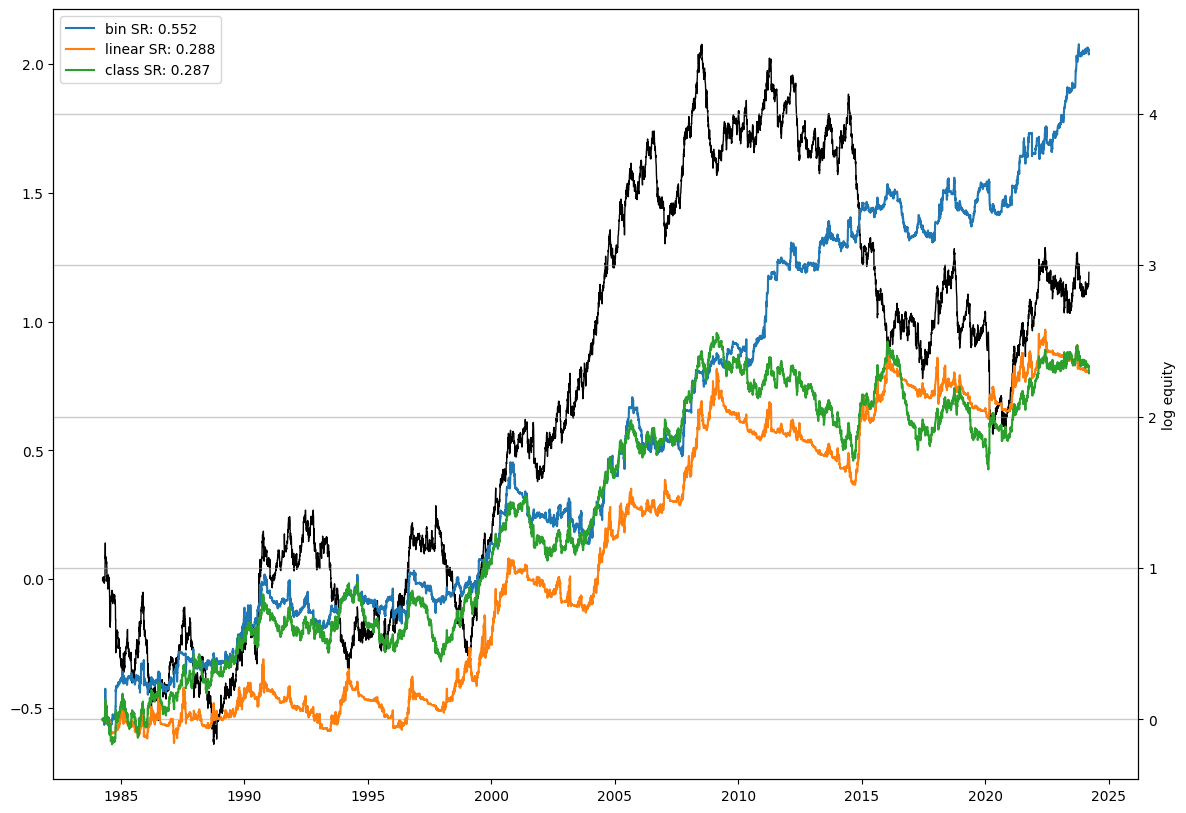

In [55]:

fig, ax1 = plt.subplots(figsize=(14, 10))
# plt.title( '{}: Stage Two Model SR: {:4.3f}'.format(symbol, stage_2_sr), fontsize=15)

ax1.plot(bin_backtest_df['bh_pnl'], color='black', linewidth='1')

ax2 = ax1.twinx()
ax2.plot(bin_backtest_df['bin_model_pnl'], label='{} SR: {:4.3f}'.format('bin', bin_model_sr))
ax2.plot(bin_backtest_df['linear_model_pnl'], label='{} SR: {:4.3f}'.format('linear', lin_model_sr))
ax2.plot(bin_backtest_df['class_model_pnl'], label='{} SR: {:4.3f}'.format('class', class_model_sr))

plt.grid(which='major', axis='both', linewidth='1', color='#999999', alpha=0.5)
plt.ylabel("log equity")
plt.legend()
plt.show()
# fig.savefig('{0}/{1}/{2}/{3}/{3}.stage_two.{4}.equity.png'
#             .format(osprey_experiment_dir, experiment_name, asset_class, symbol, name_str))
plt.close(fig)
